In [1]:
#Import modules

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns

print("Import successfull")

Import successfull


In [4]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [5]:
#Load data and pre processing
data = pd.read_sql_query("SELECT a.*, p.*, g.nursery, g.kindergarten from grid_access_comp a, grid_population p, grid_access_20 g where a.grid_id = p.grid_id and p.grid_id = g.grid_id;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
#remove extreme values from data
data
print("Tables selected successfully")

Tables selected successfully


In [6]:
amenities_education = ['nursery','nursery_comp','kindergarten','kindergarten_comp']
origin = ['population','nomigr','migr','foreigner']
hh = ['households','hh_nochild','hh_child','hh_sp','hh_tp']

[Text(0, 0.5, 'nomigr'), Text(0, 1.5, 'migr'), Text(0, 2.5, 'foreigner')]

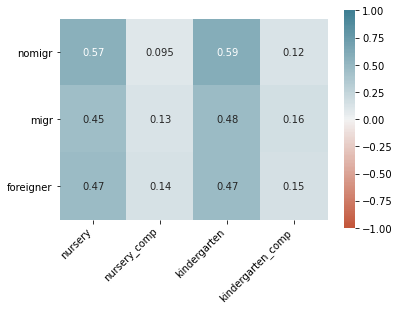

In [8]:
#education, origin
df = data.corr()
df[amenities_education][5:9]
ax = sns.heatmap(
    df[amenities_education][6:9], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

[Text(0, 0.5, 'hh_nochild'),
 Text(0, 1.5, 'hh_child'),
 Text(0, 2.5, 'hh_sp'),
 Text(0, 3.5, 'hh_tp')]

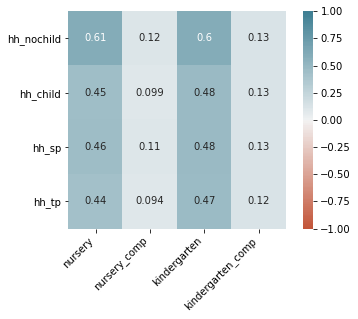

In [9]:
#education, households
df = data.corr()
ax = sns.heatmap(
    df[amenities_education][15:19], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

In [13]:
df = data.corr()
df[['nursery','kindergarten']][2:4]

,nursery,kindergarten
nursery_comp,0.476741,0.421764
kindergarten_comp,0.163130,0.004450


In [15]:
df = data.corr(method='spearman')
df[['nursery','kindergarten']][2:4]

,nursery,kindergarten
nursery_comp,0.701882,0.619856
kindergarten_comp,0.701483,0.751353


[Text(0, 0.5, 'nursery_comp'), Text(0, 1.5, 'kindergarten_comp')]

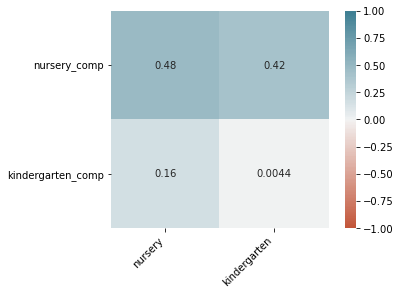

In [14]:
#education, households
df = data.corr()
ax = sns.heatmap(
    df[['nursery','kindergarten']][2:4], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

[Text(0, 0.5, 'nursery_comp'), Text(0, 1.5, 'kindergarten_comp')]

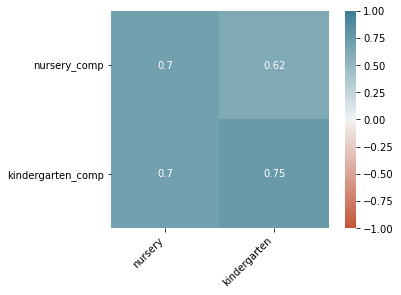

In [16]:
#education, households
df = data.corr(method='spearman')
ax = sns.heatmap(
    df[['nursery','kindergarten']][2:4], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)